# ***Packaging***

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***1. Data loading, data type correction, and removal of irrelevant variables***

In [128]:
#Loading data as df (dataframe)
df = pd.read_excel('Portfolio Puma MGM.xlsx', sheet_name=0)
df.head(2)

,Case Name,Account Name,State,Rate,Provider Client,DOL,Subject,Name of Procedure,Case Stage,Stage Chg Dt,...,Inv 1 Pd Dt,Inv 1 Pd $,Inv 2 Pd Dt,Inv 2 Pd $,Inv 3 Pd Dt,Inv 3 Pd $,Funding Status,Case Notes,Lien Notes,Case Status
0,Sundae McGrath,Ace Law Group,NaN,NaN,Pueblo Medical Imaging,09/06/2018,SMcGrath1,MRI Lumbar Spine wo Contrast,Completed,01/21/2025,...,01/20/2025,907.5,NaN,0.0,NaN,0.0,Purchased,NaN,"02,20 Settled",request has been sent to the finance departmen...
1,Sumala Chuencharoewong,Ace Law Group,NaN,NaN,Pueblo Medical Imaging,NaN,SChuen1,MRI Cervical Spine wo Contrast,Completed,09/28/2023,...,05/27/2020,940.5,NaN,NaN,NaN,NaN,Purchased,NaN,NaN,Payment DT 05-27-2020 \n


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4036 entries, 0 to 4035
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Case Name          4036 non-null   object 
 1   Account Name       4036 non-null   object 
 2   State              39 non-null     object 
 3   Rate               767 non-null    object 
 4   Provider Client    4025 non-null   object 
 5   DOL                3162 non-null   object 
 6   Subject            4036 non-null   object 
 7   Name of Procedure  3500 non-null   object 
 8   Case Stage         4036 non-null   object 
 9   Stage Chg Dt       4030 non-null   object 
 10  DOS                4026 non-null   object 
 11  Batch Dt           4013 non-null   object 
 12  Bill Amt           4035 non-null   float64
 13  Purch Amt          4035 non-null   float64
 14  Purch Dt           4015 non-null   object 
 15  Investor 1         4034 non-null   object 
 16  Port 1             4002 

In [130]:
# Antes de eliminar variables irrelevantes eliminamos los registros que no tienen fecha de pago
df = df.dropna(subset=['Pay Dt'])

# ***2. Eliminar variables irrelevantes y redundantes***
* Irrelevantes: cedulas, ids, nombres, telefonos, direcciones, códigos.
* Redundantes: validación por fórmula matemática que están repetidas

In [131]:
# Removal of irrelevant variables
irrelevant_variables = ['Case Name','Inv 1 Pd Dt','Inv 2 Pd Dt','Inv 3 Pd Dt','Case Notes','Lien Notes','Case Status','DOL','DOS','Investor 1','Port 1','Investor 2','Port 2','State','Inv 1 Purch $','Inv 2 Purch $','Inv 1 Pd $','Inv 2 Pd $','Inv 3 Pd $','Rate','Stage Chg Dt','Batch Dt','Pay Dt', 'Case Stage','Name of Procedure','Purch Dt']
df = df.drop(irrelevant_variables, axis=1, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4036 entries, 0 to 4035
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account Name     4036 non-null   object 
 1   Provider Client  4025 non-null   object 
 2   Subject          4036 non-null   object 
 3   Bill Amt         4035 non-null   float64
 4   Purch Amt        4035 non-null   float64
 5   Pay Amt          4027 non-null   float64
 6   Funding Status   4024 non-null   object 
dtypes: float64(3), object(4)
memory usage: 220.8+ KB


In [132]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,Funding Status
0,Ace Law Group,Pueblo Medical Imaging,SMcGrath1,1650.0,462.0,907.5,Purchased
1,Ace Law Group,Pueblo Medical Imaging,SChuen1,1650.0,462.0,940.5,Purchased
2,Ace Law Group,Pueblo Medical Imaging,CChuench1,1650.0,462.0,990.0,Purchased
3,Ace Law Group,Pueblo Medical Imaging,Lien1,1650.0,462.0,825.0,Purchased
4,Ace Law Group,Pueblo Medical Imaging,Lien2,1650.0,462.0,825.0,Purchased


In [133]:
# Data type casting (corrections)
categorical_columns = ['Account Name','Provider Client','Funding Status','Subject']
df[categorical_columns] = df[categorical_columns].astype('category')

numerical_columns = ['Bill Amt', 'Purch Amt','Pay Amt']
df[numerical_columns] = df[numerical_columns].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4036 entries, 0 to 4035
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     4036 non-null   category
 1   Provider Client  4025 non-null   category
 2   Subject          4036 non-null   category
 3   Bill Amt         4035 non-null   float64 
 4   Purch Amt        4035 non-null   float64 
 5   Pay Amt          4027 non-null   float64 
 6   Funding Status   4024 non-null   category
dtypes: category(4), float64(3)
memory usage: 123.5 KB


# ***3. Statistical analysis***

In [134]:
df['Account Name'].unique()

['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', 'Angulo Law Group', ..., 'VC2 Law', 'Willoughby Shulman Injury Lawyers', 'Wilshire Law Firm  CA', 'Yagoubzadeh Law Firm', 'Yan Kenyon Law']
Length: 85
Categories (85, object): ['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', ..., 'Willoughby Shulman Injury Lawyers', 'Wilshire Law Firm  CA', 'Yagoubzadeh Law Firm', 'Yan Kenyon Law']

<Axes: xlabel='Provider Client'>

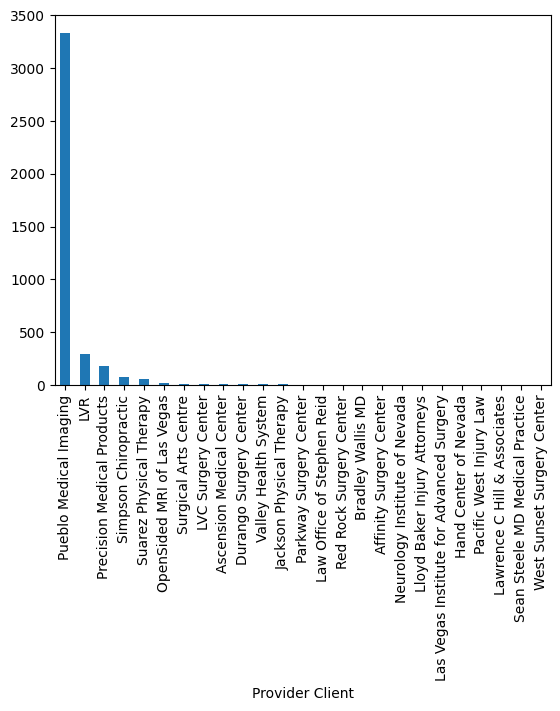

In [135]:
df['Provider Client'].value_counts().plot(kind='bar')

<Axes: xlabel='Subject'>

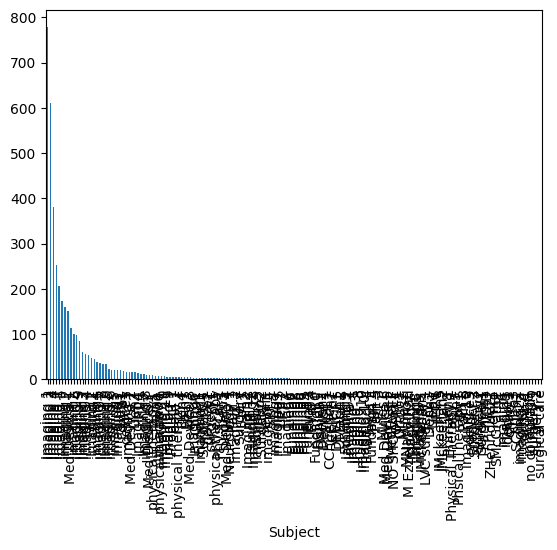

In [136]:
df['Subject'].value_counts().plot(kind='bar')

In [137]:
# print(df['Subject'].unique())
print(list(df['Subject'].unique()))

['SMcGrath1', 'SChuen1', 'CChuench1', 'Lien1', 'Lien2', 'imaging 1', 'imaging 2', 'imaging 3', 'imaging1', 'imaging2', 'pain1', 'imaging3', 'Imaging1', 'Imaging2', 'Imaging 1', 'Imaging 2', 'Imaging 3', 'Imaging 5', 'Imaging 4', 'Pain 1', 'Surgery1', 'Imaging 1 ', 'Surgery', 'Imaging 6', 'imaging4', 'Imaging  2', 'Imaging  3', 'pt1', 'PT1', 'PT 1', 'Physical 1', 'physicaltherapy 1', 'PT 2', 'PT 3', 'surgery1', 'SPT 1', 'Med Device 1', 'Med Device 2', 'pain 1', 'chiro 1', 'chiro1', 'Product 1', 'Med Device 3', 'Med Device 4', 'Med Device 1 ', 'device1', 'device2', 'Product 2', 'imaging5', 'imaging6', 'Pain1', 'Pain2', 'Pain 4', 'Pain 5', 'Imaging3', 'Imaging4', 'eval1', 'Imaging 7', 'Imaging 8', 'Imaging 9', 'imaging 10', 'Imaging 11', 'Imaging 12', 'imaging 1 ', 'surgical care', 'physicaltherapy1', 'imaging 4', 'imaging 5', 'imaging 6', 'JPT 1', 'Funding1', 'Funding2', 'LVC surgery 1', 'CKlein1', 'JMckeehan1', 'JMckeehan2', 'JMckeehan3', 'MInes1', 'MInes2', 'MNavarro1', 'Lien3', 'Lien4

<Axes: xlabel='Funding Status'>

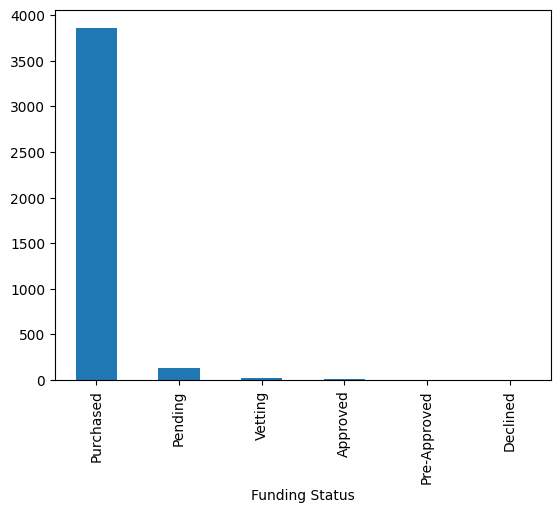

In [138]:
df['Funding Status'].value_counts().plot(kind='bar')

<Axes: >

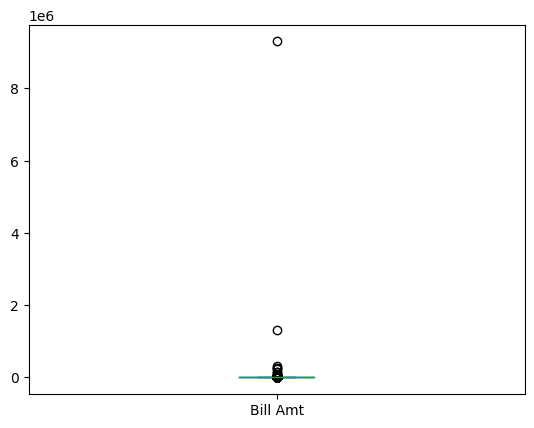

In [139]:
df['Bill Amt'].plot(kind='box')

<Axes: >

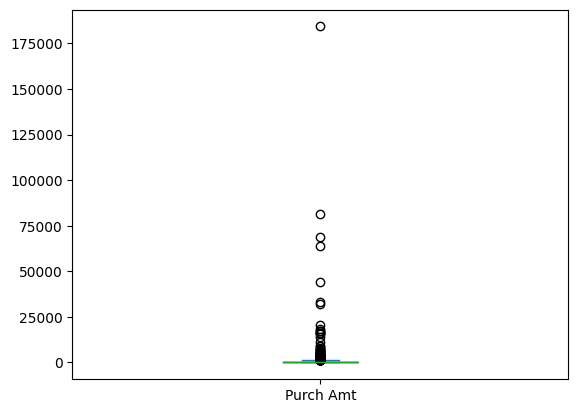

In [140]:
df['Purch Amt'].plot(kind='box')

<Axes: >

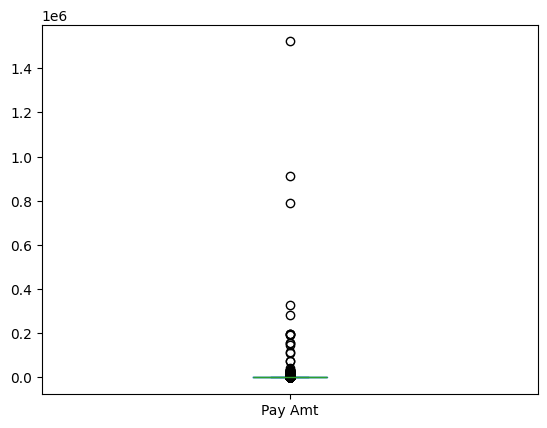

In [141]:
df['Pay Amt'].plot(kind='box')

In [142]:
# from ydata_profiling import ProfileReport

# profile_data=ProfileReport(df, minimal=True) # minimal=True
# profile_data

# ***4. Limpeza de datos y atípicos por errores***

### ***Eliminación de procesos aún no terminados para el análisis de ROI de los terminados***

In [143]:
df['Funding Status'].unique()

['Purchased', 'Pre-Approved', 'Pending', 'Approved', 'Vetting', NaN, 'Declined']
Categories (6, object): ['Approved', 'Declined', 'Pending', 'Pre-Approved', 'Purchased', 'Vetting']

In [144]:
# Se eliminan los registros que hayan sido declined porque no se tiene información completa de ellos y los que nos importa analizar son los comprados

indices_a_eliminar = df[df['Funding Status'] != 'Purchased'].index

# Eliminar esas filas usando drop(axis=0)
df.drop(indices_a_eliminar, axis=0, inplace=True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3857 entries, 0 to 4035
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3857 non-null   category
 1   Provider Client  3847 non-null   category
 2   Subject          3857 non-null   category
 3   Bill Amt         3856 non-null   float64 
 4   Purch Amt        3856 non-null   float64 
 5   Pay Amt          3850 non-null   float64 
 6   Funding Status   3857 non-null   category
dtypes: category(4), float64(3)
memory usage: 148.4 KB


In [146]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt,Funding Status
0,Ace Law Group,Pueblo Medical Imaging,SMcGrath1,1650.0,462.0,907.5,Purchased
1,Ace Law Group,Pueblo Medical Imaging,SChuen1,1650.0,462.0,940.5,Purchased
2,Ace Law Group,Pueblo Medical Imaging,CChuench1,1650.0,462.0,990.0,Purchased
3,Ace Law Group,Pueblo Medical Imaging,Lien1,1650.0,462.0,825.0,Purchased
4,Ace Law Group,Pueblo Medical Imaging,Lien2,1650.0,462.0,825.0,Purchased


<Axes: xlabel='Funding Status'>

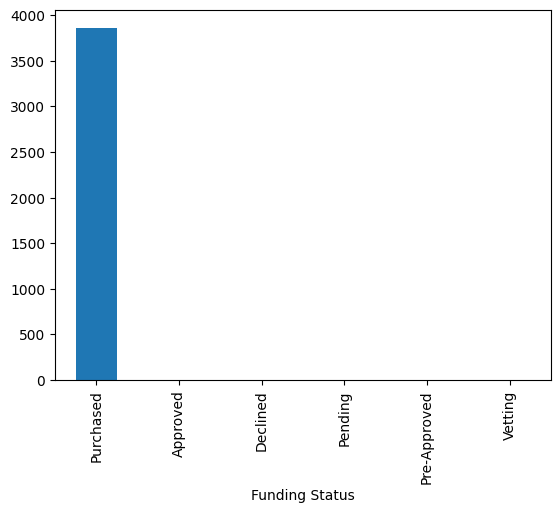

In [147]:
df['Funding Status'].value_counts().plot(kind='bar')

In [148]:
# Como todos los datos pertenecen a la cateoría Purchased de Funding Status entonces eliminamos esta variable por ser redundante
df = df.drop('Funding Status', axis=1)

### ***Existen procesos que a pesar de haber sido comprados aún no se han terminado porque están a la espera de que el abogado pague (Pay amt = nan) por lo que estos registros no se pueden utilizar porque Pay amt es nuestra variable objetivo***

In [149]:
# Se eliminan  los registros donde Pay amt sea nula

df = df.dropna(subset=['Pay Amt'])

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3850 entries, 0 to 4035
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3850 non-null   category
 1   Provider Client  3840 non-null   category
 2   Subject          3850 non-null   category
 3   Bill Amt         3849 non-null   float64 
 4   Purch Amt        3849 non-null   float64 
 5   Pay Amt          3850 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 144.2 KB


In [151]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt
0,Ace Law Group,Pueblo Medical Imaging,SMcGrath1,1650.0,462.0,907.5
1,Ace Law Group,Pueblo Medical Imaging,SChuen1,1650.0,462.0,940.5
2,Ace Law Group,Pueblo Medical Imaging,CChuench1,1650.0,462.0,990.0
3,Ace Law Group,Pueblo Medical Imaging,Lien1,1650.0,462.0,825.0
4,Ace Law Group,Pueblo Medical Imaging,Lien2,1650.0,462.0,825.0


### ***Limpieza de errores en los datos y unificación de categorías válidas mediante uso de expresiones regulares***

In [152]:
df['Subject'].unique()

['SMcGrath1', 'SChuen1', 'CChuench1', 'Lien1', 'Lien2', ..., 'ortho 1', 'Eval 1', 'Eval 2', 'Eval 3', 'Eval 4']
Length: 164
Categories (170, object): ['CChuench1', 'CKlein1', 'Chiro1', 'DEVICE1', ..., 'surgery 1', 'surgery 2', 'surgery1', 'surgical care']

<Axes: xlabel='Subject'>

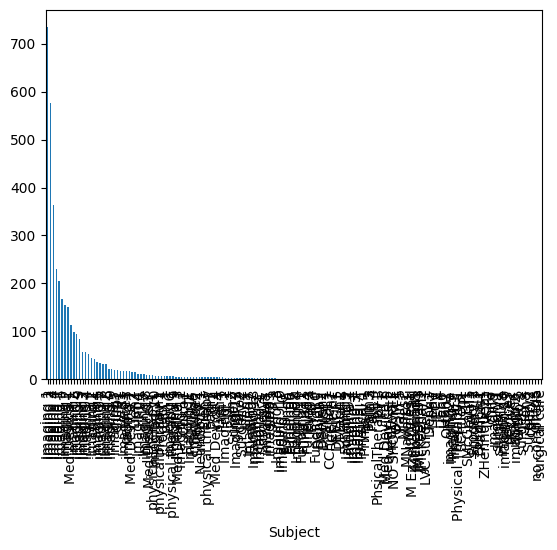

In [153]:
df['Subject'].value_counts().plot(kind='bar')

In [154]:
df['Subject'] = (
    df['Subject']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)        # espacios múltiples a uno
    .str.replace(r'[^\w\s]', ' ', regex=True)    # caracteres especiales a espacio
    .str.replace(r'\s+', ' ', regex=True)        # limpiar espacios de nuevo
    .str.strip()                                  # eliminar espacios inicio/fin
    .str.replace(r'\d+', '', regex=True)         # eliminar números (imaging1 → imaging)
    .str.strip()                                  # limpiar espacios finales
)
# Creación de columna de limpieza
df['Subject_Clean'] = np.nan

In [155]:
# Definir mapeo de agrupación
mapeo = {
    r'^(?:imaging|iamging|imagine|imagin|imagiong|imag)': 'Imaging',
    r'^(?:surg|surgical|lcv|lvc|surgical\s*care)': 'Surgery',
    r'^(?:med\s*dev|device|decive|product|mec\s*device|medprod)': 'Medical Device',
    r'^(?:pt|spt|jpt|physical|phsicaltherapy|phystherapy)': 'Physical Therapy',
    r'^(?:chiro|ad\s*chiro)': 'Chiropractic',
    r'^pain': 'Pain Management',
    r'^(?:neuro|neurology)': 'Neurology',
    r'^(?:eval|medeval|consult)': 'Evaluation',
    r'^primary': 'Primary Care',
    r'^lab': 'Laboratory',
    r'^ortho': 'Orthopedics',
    r'^lien': 'Lien',
    r'^pharmacy': 'Pharmacy',
    r'^(?:psych)': 'Psychiatry',
    r'^er$': 'Emergency Room',
    r'^amnio': 'Amniocentesis',
    r'^(?:funding|void|osm|oms|sac|has|adc|no\s*show|loan|test)': 'Administrative',
    r'^procedure': 'Medical Procedure'
}

for pattern, category in mapeo.items():
    mask = df['Subject'].str.contains(pattern, regex=True, na=False)
    df.loc[mask, 'Subject_Clean'] = category

print(f"\nCategorización por patrones completada")
print(f"Registros categorizados: {df['Subject_Clean'].notna().sum()}")
print(f"Registros sin categorizar: {df['Subject_Clean'].isna().sum()}")

uncategorized = df[df['Subject_Clean'].isna()]['Subject'].unique()

# if len(uncategorized) > 0:
#     print(f"\nVALORES NO CATEGORIZADOS ({len(uncategorized)}):")
#     print("Estos serán eliminados del análisis:")
#     for val in sorted(uncategorized)[:30]:
#         count = (df['Subject'] == val).sum()
#         print(f"   - '{val}' (n={count})")
#     if len(uncategorized) > 30:
#         print(f"   ... y {len(uncategorized) - 30} más")

# Reemplazamos los datos de Subject por los limpiados
df['Subject'] = df['Subject_Clean']
df = df.drop('Subject_Clean', axis=1)



Categorización por patrones completada
Registros categorizados: 3833
Registros sin categorizar: 17


C:\Users\crist\AppData\Local\Temp\ipykernel_3852\3376970377.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Imaging' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'Subject_Clean'] = category


In [156]:
uncategorized

array(['smcgrath', 'schuen', 'cchuench', 'cklein', 'jmckeehan', 'mines',
       'mnavarro', 'dmarin', 'zhenriquez', 'dshieh', 'm ezzell lv rad',
       'tparhms', 'lteng'], dtype=object)

In [157]:
df['Subject'].unique()

array([nan, 'Lien', 'Imaging', 'Pain Management', 'Surgery',
       'Physical Therapy', 'Medical Device', 'Chiropractic',
       'Administrative', 'Evaluation', 'Neurology', 'Orthopedics',
       'Primary Care'], dtype=object)

In [158]:
df['Subject'].value_counts()

Subject
Imaging             3405
Medical Device       181
Chiropractic          68
Physical Therapy      56
Lien                  46
Pain Management       28
Surgery               18
Administrative        18
Evaluation             6
Neurology              4
Orthopedics            2
Primary Care           1
Name: count, dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3850 entries, 0 to 4035
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3850 non-null   category
 1   Provider Client  3840 non-null   category
 2   Subject          3833 non-null   object  
 3   Bill Amt         3849 non-null   float64 
 4   Purch Amt        3849 non-null   float64 
 5   Pay Amt          3850 non-null   float64 
dtypes: category(2), float64(3), object(1)
memory usage: 161.4+ KB


### ***Organización de categorías de Account Name***

In [160]:
print(list(df['Account Name'].unique()))

['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law  California', 'Beverly Law', 'Bighorn Law  Las Vegas', 'Blackburn Wirth Injury Team', 'Bruning Law Firm', 'Burris & Thomas Law', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'Compass Law Group', 'Connell Law', 'David W Fassett Personal Injury Law', 'Dias Hall Law', 'Dimopoulos Injury Law', 'Downtown LA Law Group', 'ER Injury Attorneys', 'Farahi Law Firm', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Garg Golden Law Firm', 'Gina Corena Law', 'Goldberg Injury Law', 'Hale Injury Law', 'Harris Personal Injury Lawyers  CA', 'Jacoby & Meyers  CA', 'Kang & Associates', 'Karns & Karns Law Firm', 'Ladah Law', 'Lalezary Law Firm  CA Law Brothers', 'Larian Law Firm', 'Larry H Parker Law', 'Law Office of Arash Khorsandi', 

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3850 entries, 0 to 4035
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3850 non-null   category
 1   Provider Client  3840 non-null   category
 2   Subject          3833 non-null   object  
 3   Bill Amt         3849 non-null   float64 
 4   Purch Amt        3849 non-null   float64 
 5   Pay Amt          3850 non-null   float64 
dtypes: category(2), float64(3), object(1)
memory usage: 161.4+ KB


In [162]:
df['Account Name'] = (
    df['Account Name']
    .astype(str)
    .str.strip()
    # .str.lower()
    .str.replace(r'\s+', ' ', regex=True)          # Espacios múltiples → uno
    .str.replace(r'[^\w\s&]', '', regex=True)      # Eliminar símbolos raros (excepto &)
    .str.strip()
)
# Creación de columna de limpieza
df['AccountName_Clean'] = np.nan

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3850 entries, 0 to 4035
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Account Name       3850 non-null   object  
 1   Provider Client    3840 non-null   category
 2   Subject            3833 non-null   object  
 3   Bill Amt           3849 non-null   float64 
 4   Purch Amt          3849 non-null   float64 
 5   Pay Amt            3850 non-null   float64 
 6   AccountName_Clean  0 non-null      float64 
dtypes: category(1), float64(4), object(2)
memory usage: 215.0+ KB


In [164]:
unique_clean = []

from rapidfuzz import fuzz

for firm in df['Account Name'].unique():
    clean = firm.strip()
    match_found = False
    for ref in unique_clean:
        if fuzz.ratio(clean, ref) > 80:   # Umbral de similitud
            match_found = True
            df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = ref
            break
    if not match_found:
        unique_clean.append(clean)
        df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = clean

C:\Users\crist\AppData\Local\Temp\ipykernel_3852\3216805034.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Ace Law Group' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Account Name'] == firm, 'AccountName_Clean'] = clean


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3850 entries, 0 to 4035
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Account Name       3850 non-null   object  
 1   Provider Client    3840 non-null   category
 2   Subject            3833 non-null   object  
 3   Bill Amt           3849 non-null   float64 
 4   Purch Amt          3849 non-null   float64 
 5   Pay Amt            3850 non-null   float64 
 6   AccountName_Clean  3850 non-null   object  
dtypes: category(1), float64(3), object(3)
memory usage: 215.0+ KB


In [166]:
# --- Reemplazar columna original por la limpia ---
df['Account Name'] = df['AccountName_Clean']
df = df.drop('AccountName_Clean', axis=1)

print(list(df['Account Name'].unique()))

['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law California', 'Beverly Law', 'Bighorn Law Las Vegas', 'Blackburn Wirth Injury Team', 'Bruning Law Firm', 'Burris & Thomas Law', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'Compass Law Group', 'Connell Law', 'David W Fassett Personal Injury Law', 'Dias Hall Law', 'Dimopoulos Injury Law', 'Downtown LA Law Group', 'ER Injury Attorneys', 'Farahi Law Firm', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Garg Golden Law Firm', 'Gina Corena Law', 'Goldberg Injury Law', 'Hale Injury Law', 'Harris Personal Injury Lawyers CA', 'Jacoby & Meyers CA', 'Kang & Associates', 'Karns & Karns Law Firm', 'Ladah Law', 'Lalezary Law Firm CA Law Brothers', 'Larian Law Firm', 'Larry H Parker Law', 'Law Office of Arash Khorsandi', 'Law 

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3850 entries, 0 to 4035
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3850 non-null   object  
 1   Provider Client  3840 non-null   category
 2   Subject          3833 non-null   object  
 3   Bill Amt         3849 non-null   float64 
 4   Purch Amt        3849 non-null   float64 
 5   Pay Amt          3850 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 185.0+ KB


In [168]:
df[~((df['Account Name'].map(df['Account Name'].value_counts()) < 2) & (df['Pay Amt'].isna()))]
print(list(df['Account Name'].unique()))

['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law California', 'Beverly Law', 'Bighorn Law Las Vegas', 'Blackburn Wirth Injury Team', 'Bruning Law Firm', 'Burris & Thomas Law', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'Compass Law Group', 'Connell Law', 'David W Fassett Personal Injury Law', 'Dias Hall Law', 'Dimopoulos Injury Law', 'Downtown LA Law Group', 'ER Injury Attorneys', 'Farahi Law Firm', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Garg Golden Law Firm', 'Gina Corena Law', 'Goldberg Injury Law', 'Hale Injury Law', 'Harris Personal Injury Lawyers CA', 'Jacoby & Meyers CA', 'Kang & Associates', 'Karns & Karns Law Firm', 'Ladah Law', 'Lalezary Law Firm CA Law Brothers', 'Larian Law Firm', 'Larry H Parker Law', 'Law Office of Arash Khorsandi', 'Law 

In [169]:
df = df[df['Account Name'].map(df['Account Name'].value_counts()) > 2]
print(list(df['Account Name'].unique()))


['Ace Law Group', 'Adamson Ahdoot LLP', 'Agwara Law', 'Allen Injury Law LLC', 'Angulo Law Group', 'Atkinson Watkins & Hoffman Attorneys', 'Ayala Morgan & Buzzard', 'BANAFSHE LAW FIRM PC', 'BD & J Law Firm', 'Benjamin Nadig Law', 'Benson Allred Injury Law', 'Berg Law California', 'Beverly Law', 'Bighorn Law Las Vegas', 'Blackburn Wirth Injury Team', 'Bruning Law Firm', 'Burris & Thomas Law', 'Cardenas Law Group', 'Carpenter & Zuckerman', 'Compass Law Group', 'Connell Law', 'David W Fassett Personal Injury Law', 'Dias Hall Law', 'Dimopoulos Injury Law', 'Downtown LA Law Group', 'ER Injury Attorneys', 'Farahi Law Firm', 'Fuller Law Practice', 'G Dallas Horton & Associates', 'Garg Golden Law Firm', 'Gina Corena Law', 'Goldberg Injury Law', 'Hale Injury Law', 'Harris Personal Injury Lawyers CA', 'Jacoby & Meyers CA', 'Kang & Associates', 'Karns & Karns Law Firm', 'Ladah Law', 'Lalezary Law Firm CA Law Brothers', 'Larian Law Firm', 'Larry H Parker Law', 'Law Office of Arash Khorsandi', 'Law 

In [170]:
len(list(df['Account Name'].unique()))
# Quedaron un total de 251 categorías

84

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3848 entries, 0 to 4035
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3848 non-null   object  
 1   Provider Client  3838 non-null   category
 2   Subject          3831 non-null   object  
 3   Bill Amt         3847 non-null   float64 
 4   Purch Amt        3847 non-null   float64 
 5   Pay Amt          3848 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 184.9+ KB


### ***Organización de categorías de Provider Client***
**Para esta variable todas las categorías coinciden con las variables válidas en el negocio**

In [172]:
print(list(df['Provider Client'].unique()))

['Pueblo Medical Imaging', 'LVR', 'Durango Surgery Center', 'Valley Health System', 'Parkway Surgery Center', 'West Sunset Surgery Center', 'Suarez Physical Therapy', 'Jackson Physical Therapy', 'Precision Medical Products', 'Ascension Medical Center', 'Simpson Chiropractic', 'Law Office of Stephen Reid', 'Surgical Arts Centre', 'OpenSided MRI of Las Vegas', 'LVC Surgery Center', 'Sean Steele MD Medical Practice', 'Red Rock Surgery Center', nan, 'Affinity Surgery Center', 'Hand Center of Nevada', 'Lawrence C Hill & Associates', 'Lloyd Baker Injury Attorneys', 'Neurology Institute of Nevada', 'Bradley Wallis MD', 'Pacific West Injury Law']


In [173]:
len(list(df['Provider Client'].unique()))

25

# ***5. Limpieza de datos nulos: Imputación***

Estrategia:
* Eliminar registros con mas de 15% de nulos
* Eliminar columnas con mas de 15%-20% de nulos
* Imputar por media, moda, mediana, vecinos cercanos. No se puede imputar más allá del 15% de los datos.
* Para casos especiales se crea modelo predictivo

In [174]:
#Corrección del tipo de datos object a categorías
categorical_columns = ['Account Name', 'Subject','Provider Client']
df[categorical_columns] = df[categorical_columns].astype('category')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3848 entries, 0 to 4035
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3848 non-null   category
 1   Provider Client  3838 non-null   category
 2   Subject          3831 non-null   category
 3   Bill Amt         3847 non-null   float64 
 4   Purch Amt        3847 non-null   float64 
 5   Pay Amt          3848 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 135.4 KB


In [176]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer

#Imputacion de variables numéricas: media
var_numericas = ['Bill Amt','Purch Amt']
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
df[var_numericas] = ImpNumeros.fit_transform(df[var_numericas])

#Imputacion de variables categóricas: moda
var_categoricas = ['Provider Client','Subject']
ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[var_categoricas] = ImpCategorias.fit_transform(df[var_categoricas])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3848 entries, 0 to 4035
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     3848 non-null   category
 1   Provider Client  3848 non-null   object  
 2   Subject          3848 non-null   object  
 3   Bill Amt         3848 non-null   float64 
 4   Purch Amt        3848 non-null   float64 
 5   Pay Amt          3848 non-null   float64 
dtypes: category(1), float64(3), object(2)
memory usage: 186.8+ KB


In [177]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt
0,Ace Law Group,Pueblo Medical Imaging,Imaging,1650.0,462.0,907.5
1,Ace Law Group,Pueblo Medical Imaging,Imaging,1650.0,462.0,940.5
2,Ace Law Group,Pueblo Medical Imaging,Imaging,1650.0,462.0,990.0
3,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,825.0
4,Ace Law Group,Pueblo Medical Imaging,Lien,1650.0,462.0,825.0


In [180]:
#Normalización: Sólo para variables numéricas (no dummies)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df[[ 'Bill Amt', 'Purch Amt']] = min_max_scaler.fit_transform(df[['Bill Amt', 'Purch Amt']])
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Pay Amt
0,Ace Law Group,Pueblo Medical Imaging,Imaging,0.000178,0.005679,907.5
1,Ace Law Group,Pueblo Medical Imaging,Imaging,0.000178,0.005679,940.5
2,Ace Law Group,Pueblo Medical Imaging,Imaging,0.000178,0.005679,990.0
3,Ace Law Group,Pueblo Medical Imaging,Lien,0.000178,0.005679,825.0
4,Ace Law Group,Pueblo Medical Imaging,Lien,0.000178,0.005679,825.0


In [ ]:
#Variables categóricas con más de 2 categorías -> No borramos
df = pd.get_dummies(df, columns=['Account Name','Provider Client','Subject'], drop_first=False)

In [182]:
df.head()

,Bill Amt,Purch Amt,Pay Amt,Account Name_Ace Law Group,Account Name_Adamson Ahdoot LLP,Account Name_Agwara Law,Account Name_Allen Injury Law LLC,Account Name_Angulo Law Group,Account Name_Atkinson Watkins & Hoffman Attorneys,Account Name_Ayala Morgan & Buzzard,...,Subject_Evaluation,Subject_Imaging,Subject_Lien,Subject_Medical Device,Subject_Neurology,Subject_Orthopedics,Subject_Pain Management,Subject_Physical Therapy,Subject_Primary Care,Subject_Surgery
0,0.000178,0.005679,907.5,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,0.000178,0.005679,940.5,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,0.000178,0.005679,990.0,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,0.000178,0.005679,825.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.000178,0.005679,825.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [183]:
df.to_csv('data_prepared.csv')